In [50]:
!pip install -q kaggle

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [53]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download whenamancodes/student-performance
!unzip -o student-performance.zip

Dataset URL: https://www.kaggle.com/datasets/whenamancodes/student-performance
License(s): Attribution 4.0 International (CC BY 4.0)
student-performance.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  student-performance.zip
  inflating: Maths.csv               
  inflating: Portuguese.csv          


In [54]:
import pandas as pd
math_df = pd.read_excel('/content/Maths.csv')
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [55]:
por_df = pd.read_excel('/content/Portuguese.csv')
por_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [56]:
merge_df=pd.concat([math_df,por_df])
merge_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [57]:
merge_df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [58]:
merge_df.shape

(1048, 33)

In [59]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048 entries, 0 to 650
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1048 non-null   object
 1   sex         1048 non-null   object
 2   age         1048 non-null   int64 
 3   address     1048 non-null   object
 4   famsize     1048 non-null   object
 5   Pstatus     1048 non-null   object
 6   Medu        1048 non-null   int64 
 7   Fedu        1048 non-null   int64 
 8   Mjob        1048 non-null   object
 9   Fjob        1048 non-null   object
 10  reason      1048 non-null   object
 11  guardian    1048 non-null   object
 12  traveltime  1048 non-null   int64 
 13  studytime   1048 non-null   int64 
 14  failures    1048 non-null   int64 
 15  schoolsup   1048 non-null   object
 16  famsup      1048 non-null   object
 17  paid        1048 non-null   object
 18  activities  1048 non-null   object
 19  nursery     1048 non-null   object
 20  higher      10

In [60]:
merge_df.nunique()

,0
school,2
sex,2
age,8
address,2
famsize,2
Pstatus,2
Medu,5
Fedu,5
Mjob,5
Fjob,5


In [61]:
categorical_features=merge_df.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical features:{categorical_features}')
print(f'Total_categorical_features:{len(categorical_features)}')
numerical_features=merge_df.select_dtypes(exclude=['object']).columns.tolist()
print(f'Numerical features:{numerical_features}')
print(f'Total_numerical_features:{len(numerical_features)}')

Categorical features:['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Total_categorical_features:17
Numerical features:['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
Total_numerical_features:16


In [62]:
#Now we will do label enconder to convert the categorical value to numerical value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_features:
  merge_df[i]=le.fit_transform(merge_df[i])
merge_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [63]:
#Here age, absences, G1, G2 has continous values that's why using feature scaling
from sklearn.preprocessing import StandardScaler
continuous_features = ['age', 'absences', 'G1', 'G2']
scaler = StandardScaler()
merge_df[continuous_features] = scaler.fit_transform(merge_df[continuous_features])
merge_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,1.023851,1,0,0,4,4,0,4,...,4,3,4,1,1,3,0.253697,-2.059553,-1.592860,6
1,0,0,0.217693,1,0,1,1,1,0,2,...,5,3,3,1,1,3,-0.068966,-2.059553,-1.897092,6
2,0,0,-1.394622,1,1,1,1,1,0,2,...,4,3,2,2,3,3,0.899024,-1.394403,-0.984398,10
3,0,0,-1.394622,1,0,1,4,2,1,3,...,3,2,2,1,1,5,-0.391629,1.266197,0.840991,15
4,0,0,-0.588464,1,0,1,3,3,2,2,...,4,3,2,1,2,5,-0.068966,-1.726978,-0.375935,10


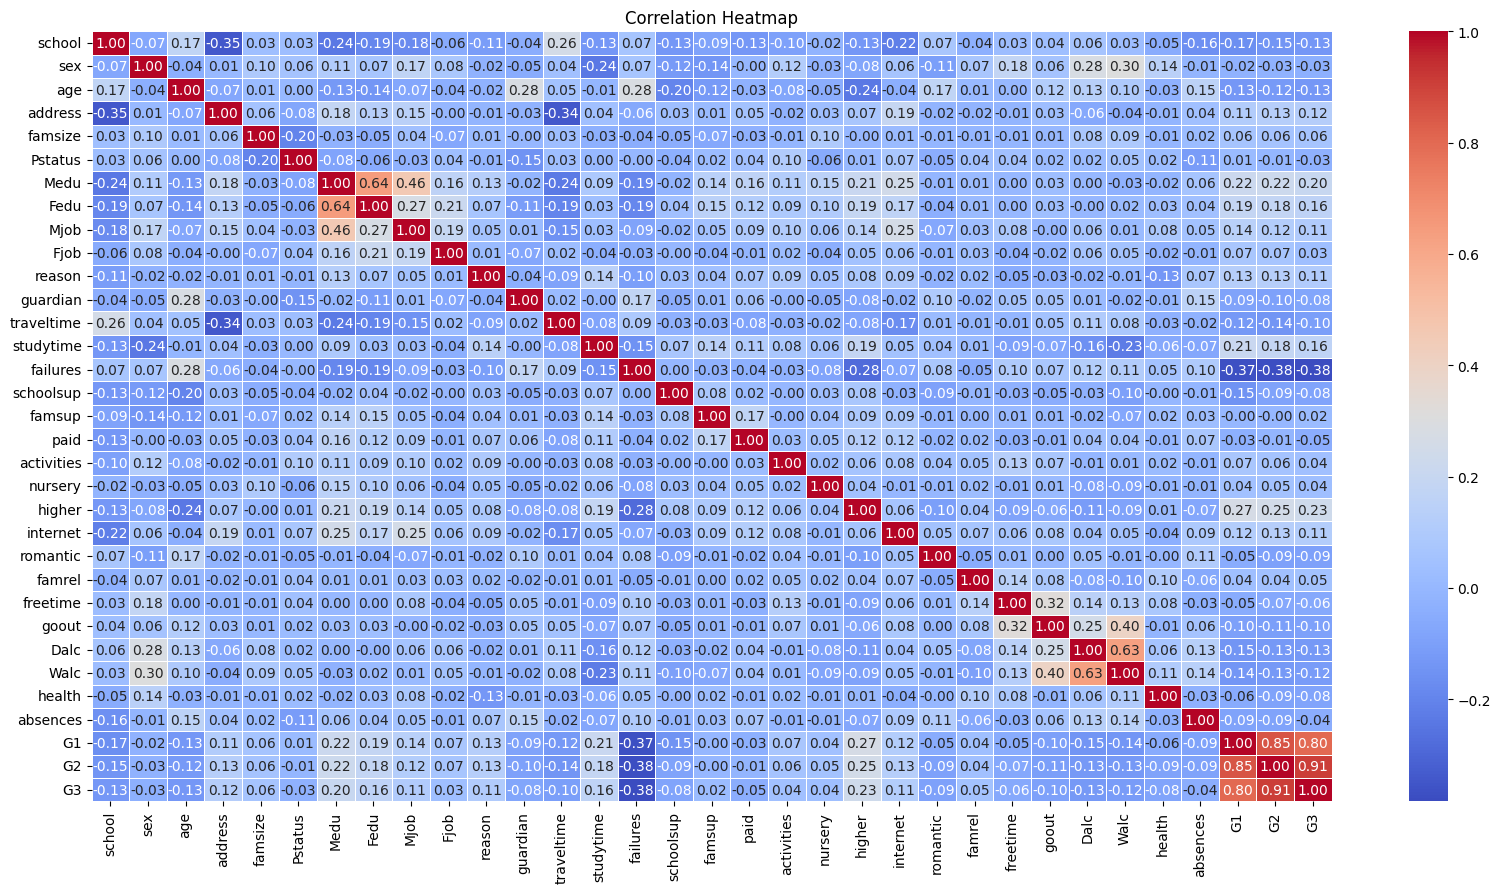

In [64]:
# now let's check Heatmap for correlation
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix= merge_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [65]:
#From the heat map we can see that G1, G2 ar highly corelated with G3 but
#Here G1	first period grade G2	second period grade G3	final grade so it is diffcult to predict G3 without G2 and G1 that's why
#we did not droped G1 and G2
#And other features has bellow 85% correlation that's why we did not droped any features.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer, OrdinalEncoder, StandardScaler

x = merge_df.drop(columns=['G3'])
y = merge_df['G3']

# 70-30 train-test split (before any preprocessing to avoid data leakage)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Label encoding for categorical features (fit only on train data)
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
encoder.fit(X_train[categorical_features])
X_train[categorical_features] = encoder.transform(X_train[categorical_features])
X_test[categorical_features] = encoder.transform(X_test[categorical_features])

# Feature scaling for continuous features (fit only on train data)
continuous_features = ['age', 'absences', 'G1', 'G2']
scaler = StandardScaler()
scaler.fit(X_train[continuous_features])
X_train[continuous_features] = scaler.transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

# Apply KBinsDiscretizer to bin the target variable (fit only on train target)
n_bins = 3
binning = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
binning.fit(y_train.values.reshape(-1, 1))
y_train_binned = binning.transform(y_train.values.reshape(-1, 1)).astype(int).flatten()
y_test_binned = binning.transform(y_test.values.reshape(-1, 1)).astype(int).flatten()

# Update y_train and y_test to binned versions
y_train = y_train_binned
y_test = y_test_binned

print(f"Train set shape: {X_train.shape, y_train.shape}")
print(f"Test set shape: {X_test.shape, y_test.shape}")

Train set shape: ((733, 32), (733,))
Test set shape: ((315, 32), (315,))


Class 0: 59 instances
Class 1: 472 instances
Class 2: 202 instances


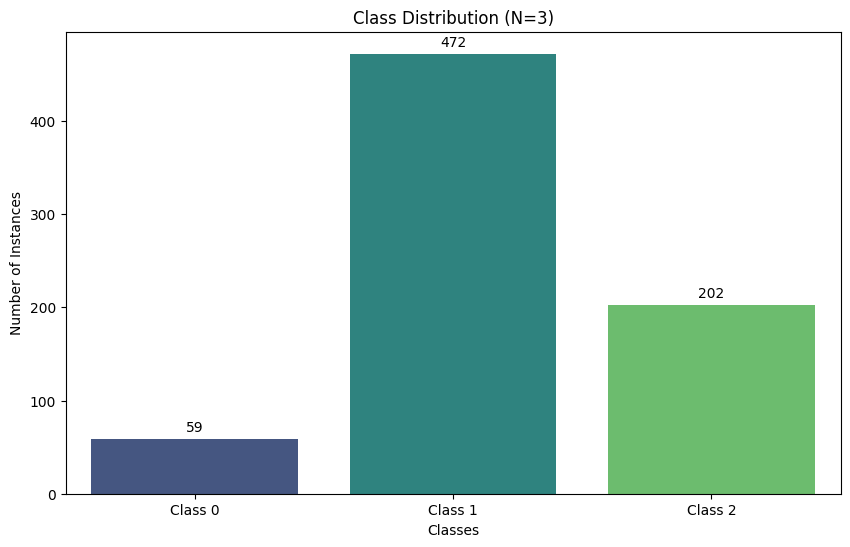

In [67]:
import warnings
temp_df = pd.DataFrame({'target': y_train})  # Use y_train (now binned)
class_counts = temp_df['target'].value_counts().sort_index()
for cls, count in class_counts.items():
    print(f"Class {cls}: {count} instances")

warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
for i, count in enumerate(class_counts.values):
    ax.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)
plt.title(f"Class Distribution (N={len(class_counts)})")
plt.xlabel("Classes")
plt.ylabel("Number of Instances")
plt.xticks(range(len(class_counts)), [f"Class {int(c)}" for c in class_counts.index])
plt.show()

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# Gradient Descent
gd_model = SGDClassifier(random_state=42, class_weight='balanced')
gd_model.fit(X_train, y_train)
y_pred_gd = gd_model.predict(X_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)
print(f"Gradient Descent Accuracy: {accuracy_gd:.2f}")

# Support Vector Machine
svm_model = SVC(kernel='linear', random_state=42, class_weight='balanced')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

# Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")

Decision Tree Accuracy: 0.86
Gradient Descent Accuracy: 0.84
SVM Accuracy: 0.81
Random Forest Accuracy: 0.88
Naive Bayes Accuracy: 0.75


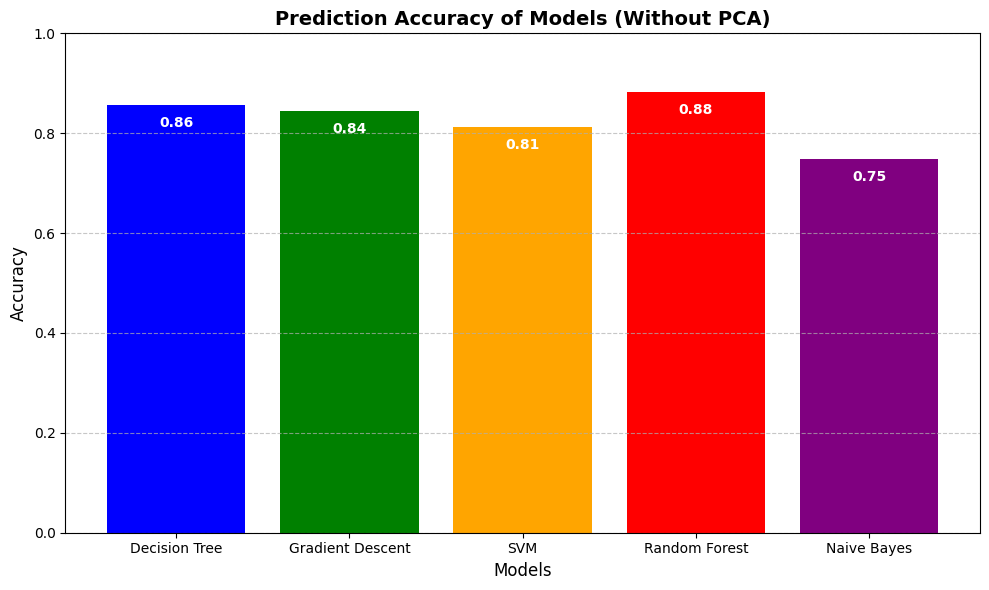

In [69]:
model_names = ['Decision Tree', 'Gradient Descent', 'SVM', 'Random Forest', 'Naive Bayes']
accuracies = [accuracy_dt, accuracy_gd, accuracy_svm, accuracy_rf, accuracy_nb]
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange', 'red', 'purple']
bars = plt.bar(model_names, accuracies, color=colors)

for i in range(len(bars)):
    plt.text(bars[i].get_x() + bars[i].get_width() / 2,
             bars[i].get_height() - 0.05,
             f"{accuracies[i]:.2f}", ha='center', va='bottom', fontsize=10, color='white', fontweight='bold')

plt.ylim(0, 1)
plt.title('Prediction Accuracy of Models (Without PCA)', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [70]:
# This cell has been moved to the end of the notebook

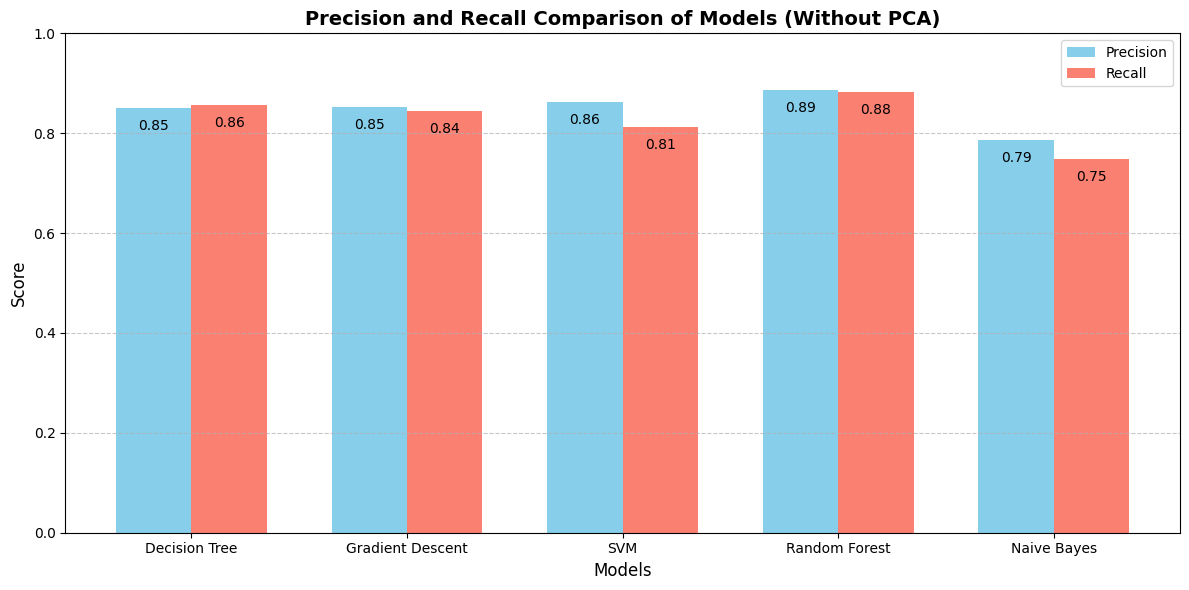

In [71]:
from sklearn.metrics import precision_score, recall_score

precision_scores = []
recall_scores = []
# Decision Tree
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
precision_scores.append(precision_dt)
recall_scores.append(recall_dt)

# Gradient Descent
precision_gd = precision_score(y_test, y_pred_gd, average='weighted')
recall_gd = recall_score(y_test, y_pred_gd, average='weighted')
precision_scores.append(precision_gd)
recall_scores.append(recall_gd)

# Support Vector Machine
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
precision_scores.append(precision_svm)
recall_scores.append(recall_svm)

# Random Forest
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
precision_scores.append(precision_rf)
recall_scores.append(recall_rf)

# Naive Bayes
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
precision_scores.append(precision_nb)
recall_scores.append(recall_nb)

model_names = ['Decision Tree', 'Gradient Descent', 'SVM', 'Random Forest', 'Naive Bayes']
x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(12, 6))
precision_bars = plt.bar(x - width/2, precision_scores, width, label='Precision', color='skyblue')
recall_bars = plt.bar(x + width/2, recall_scores, width, label='Recall', color='salmon')

for i in range(len(precision_bars)):
    plt.text(precision_bars[i].get_x() + precision_bars[i].get_width() / 2,
             precision_bars[i].get_height() - 0.05,
             f"{precision_scores[i]:.2f}", ha='center', va='bottom', fontsize=10, color='black')
    plt.text(recall_bars[i].get_x() + recall_bars[i].get_width() / 2,
             recall_bars[i].get_height() - 0.05,
             f"{recall_scores[i]:.2f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(x, model_names)
plt.ylim(0, 1)
plt.title('Precision and Recall Comparison of Models (Without PCA)', fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [72]:
# This cell has been moved to the end of the notebook

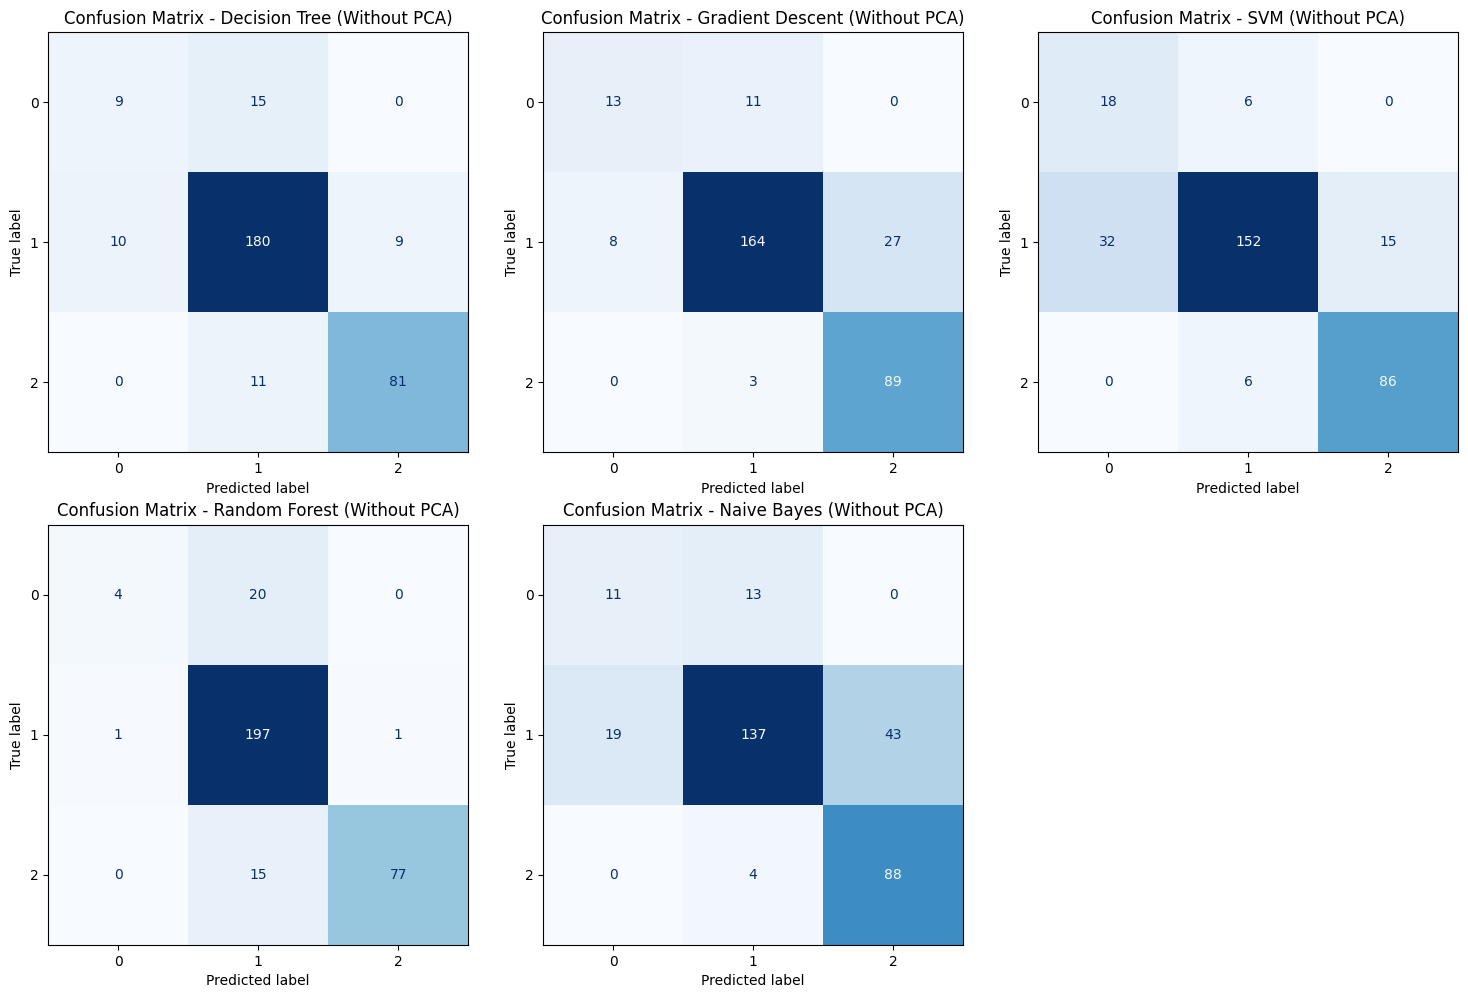

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {
    'Decision Tree': y_pred_dt,
    'Gradient Descent': y_pred_gd,
    'SVM': y_pred_svm,
    'Random Forest': y_pred_rf,
    'Naive Bayes': y_pred_nb
}
plt.figure(figsize=(15, 10))
for i, (model_name, y_pred) in enumerate(models.items(), start=1):
    plt.subplot(2, 3, i)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap='Blues', ax=plt.gca(), colorbar=False)
    plt.title(f'Confusion Matrix - {model_name} (Without PCA)')
plt.tight_layout()
plt.show()

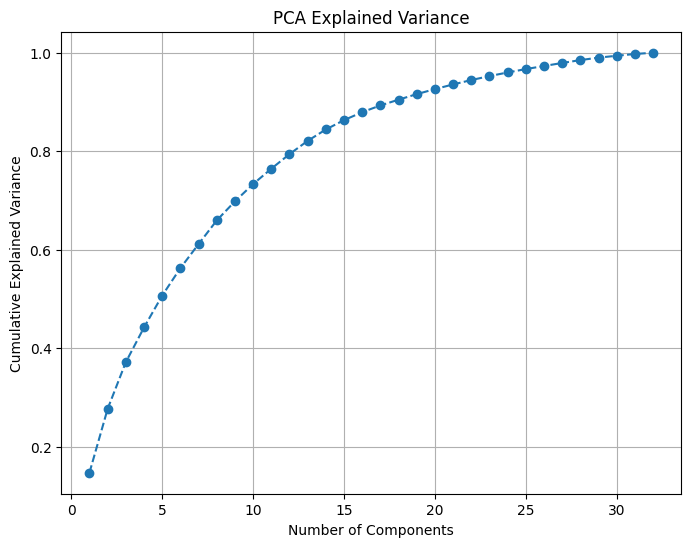

Original features: 32
PCA components: 23
Explained variance by PCA: 0.95


In [ ]:
from sklearn.decomposition import PCA

# PCA Analysis
pca_full = PCA()
pca_full.fit(X_train)
explained_variance = pca_full.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Original features: {X_train.shape[1]}")
print(f"PCA components: {X_train_pca.shape[1]}")
print(f"Explained variance by PCA: {pca.explained_variance_ratio_.sum():.2f}")

In [75]:
# Training models with PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Decision Tree with PCA
dt_model_pca = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model_pca.fit(X_train_pca, y_train)
y_pred_dt_pca = dt_model_pca.predict(X_test_pca)
accuracy_dt_pca = accuracy_score(y_test, y_pred_dt_pca)
print(f"Decision Tree (PCA) Accuracy: {accuracy_dt_pca:.2f}")

# Gradient Descent with PCA
gd_model_pca = SGDClassifier(random_state=42, class_weight='balanced')
gd_model_pca.fit(X_train_pca, y_train)
y_pred_gd_pca = gd_model_pca.predict(X_test_pca)
accuracy_gd_pca = accuracy_score(y_test, y_pred_gd_pca)
print(f"Gradient Descent (PCA) Accuracy: {accuracy_gd_pca:.2f}")

# Support Vector Machine with PCA
svm_model_pca = SVC(kernel='linear', random_state=42, class_weight='balanced')
svm_model_pca.fit(X_train_pca, y_train)
y_pred_svm_pca = svm_model_pca.predict(X_test_pca)
accuracy_svm_pca = accuracy_score(y_test, y_pred_svm_pca)
print(f"SVM (PCA) Accuracy: {accuracy_svm_pca:.2f}")

# Random Forest with PCA
rf_model_pca = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_model_pca.predict(X_test_pca)
accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
print(f"Random Forest (PCA) Accuracy: {accuracy_rf_pca:.2f}")

# Naive Bayes with PCA
nb_model_pca = GaussianNB()
nb_model_pca.fit(X_train_pca, y_train)
y_pred_nb_pca = nb_model_pca.predict(X_test_pca)
accuracy_nb_pca = accuracy_score(y_test, y_pred_nb_pca)
print(f"Naive Bayes (PCA) Accuracy: {accuracy_nb_pca:.2f}")

Decision Tree (PCA) Accuracy: 0.77
Gradient Descent (PCA) Accuracy: 0.80
SVM (PCA) Accuracy: 0.79
Random Forest (PCA) Accuracy: 0.81
Naive Bayes (PCA) Accuracy: 0.81


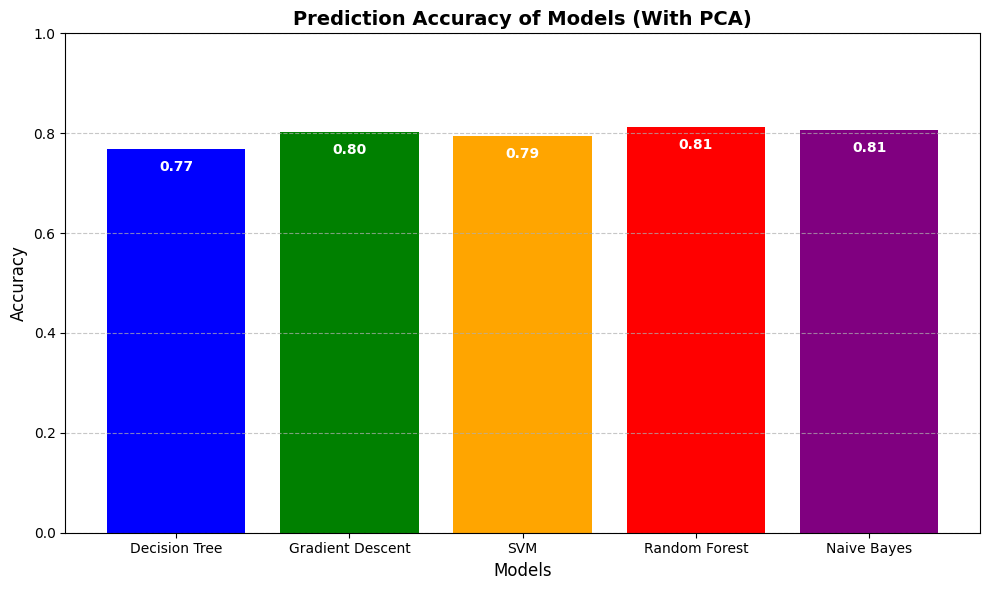

In [76]:
# Accuracy plot for models with PCA
model_names = ['Decision Tree', 'Gradient Descent', 'SVM', 'Random Forest', 'Naive Bayes']
accuracies_pca = [accuracy_dt_pca, accuracy_gd_pca, accuracy_svm_pca, accuracy_rf_pca, accuracy_nb_pca]
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange', 'red', 'purple']
bars = plt.bar(model_names, accuracies_pca, color=colors)

for i in range(len(bars)):
    plt.text(bars[i].get_x() + bars[i].get_width() / 2,
             bars[i].get_height() - 0.05,
             f"{accuracies_pca[i]:.2f}", ha='center', va='bottom', fontsize=10, color='white', fontweight='bold')

plt.ylim(0, 1)
plt.title('Prediction Accuracy of Models (With PCA)', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

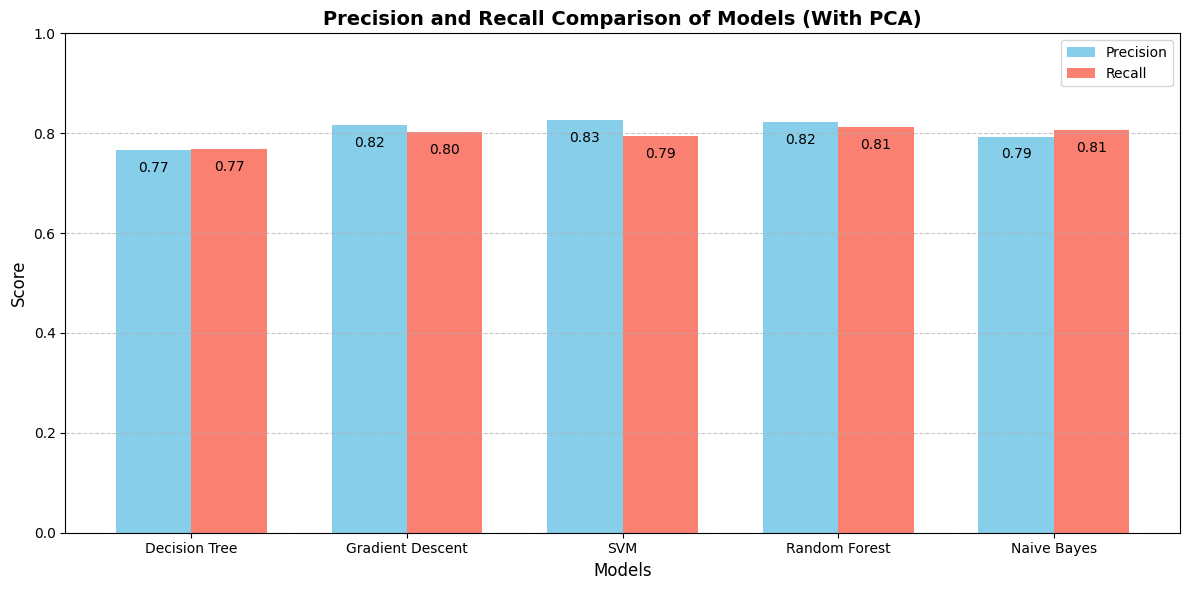

In [77]:
# Precision and Recall for models with PCA
from sklearn.metrics import precision_score, recall_score

precision_scores_pca = []
recall_scores_pca = []
# Decision Tree
precision_dt_pca = precision_score(y_test, y_pred_dt_pca, average='weighted')
recall_dt_pca = recall_score(y_test, y_pred_dt_pca, average='weighted')
precision_scores_pca.append(precision_dt_pca)
recall_scores_pca.append(recall_dt_pca)

# Gradient Descent
precision_gd_pca = precision_score(y_test, y_pred_gd_pca, average='weighted')
recall_gd_pca = recall_score(y_test, y_pred_gd_pca, average='weighted')
precision_scores_pca.append(precision_gd_pca)
recall_scores_pca.append(recall_gd_pca)

# Support Vector Machine
precision_svm_pca = precision_score(y_test, y_pred_svm_pca, average='weighted')
recall_svm_pca = recall_score(y_test, y_pred_svm_pca, average='weighted')
precision_scores_pca.append(precision_svm_pca)
recall_scores_pca.append(recall_svm_pca)

# Random Forest
precision_rf_pca = precision_score(y_test, y_pred_rf_pca, average='weighted')
recall_rf_pca = recall_score(y_test, y_pred_rf_pca, average='weighted')
precision_scores_pca.append(precision_rf_pca)
recall_scores_pca.append(recall_rf_pca)

# Naive Bayes
precision_nb_pca = precision_score(y_test, y_pred_nb_pca, average='weighted')
recall_nb_pca = recall_score(y_test, y_pred_nb_pca, average='weighted')
precision_scores_pca.append(precision_nb_pca)
recall_scores_pca.append(recall_nb_pca)

model_names = ['Decision Tree', 'Gradient Descent', 'SVM', 'Random Forest', 'Naive Bayes']
x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(12, 6))
precision_bars = plt.bar(x - width/2, precision_scores_pca, width, label='Precision', color='skyblue')
recall_bars = plt.bar(x + width/2, recall_scores_pca, width, label='Recall', color='salmon')

for i in range(len(precision_bars)):
    plt.text(precision_bars[i].get_x() + precision_bars[i].get_width() / 2,
             precision_bars[i].get_height() - 0.05,
             f"{precision_scores_pca[i]:.2f}", ha='center', va='bottom', fontsize=10, color='black')
    plt.text(recall_bars[i].get_x() + recall_bars[i].get_width() / 2,
             recall_bars[i].get_height() - 0.05,
             f"{recall_scores_pca[i]:.2f}", ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(x, model_names)
plt.ylim(0, 1)
plt.title('Precision and Recall Comparison of Models (With PCA)', fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

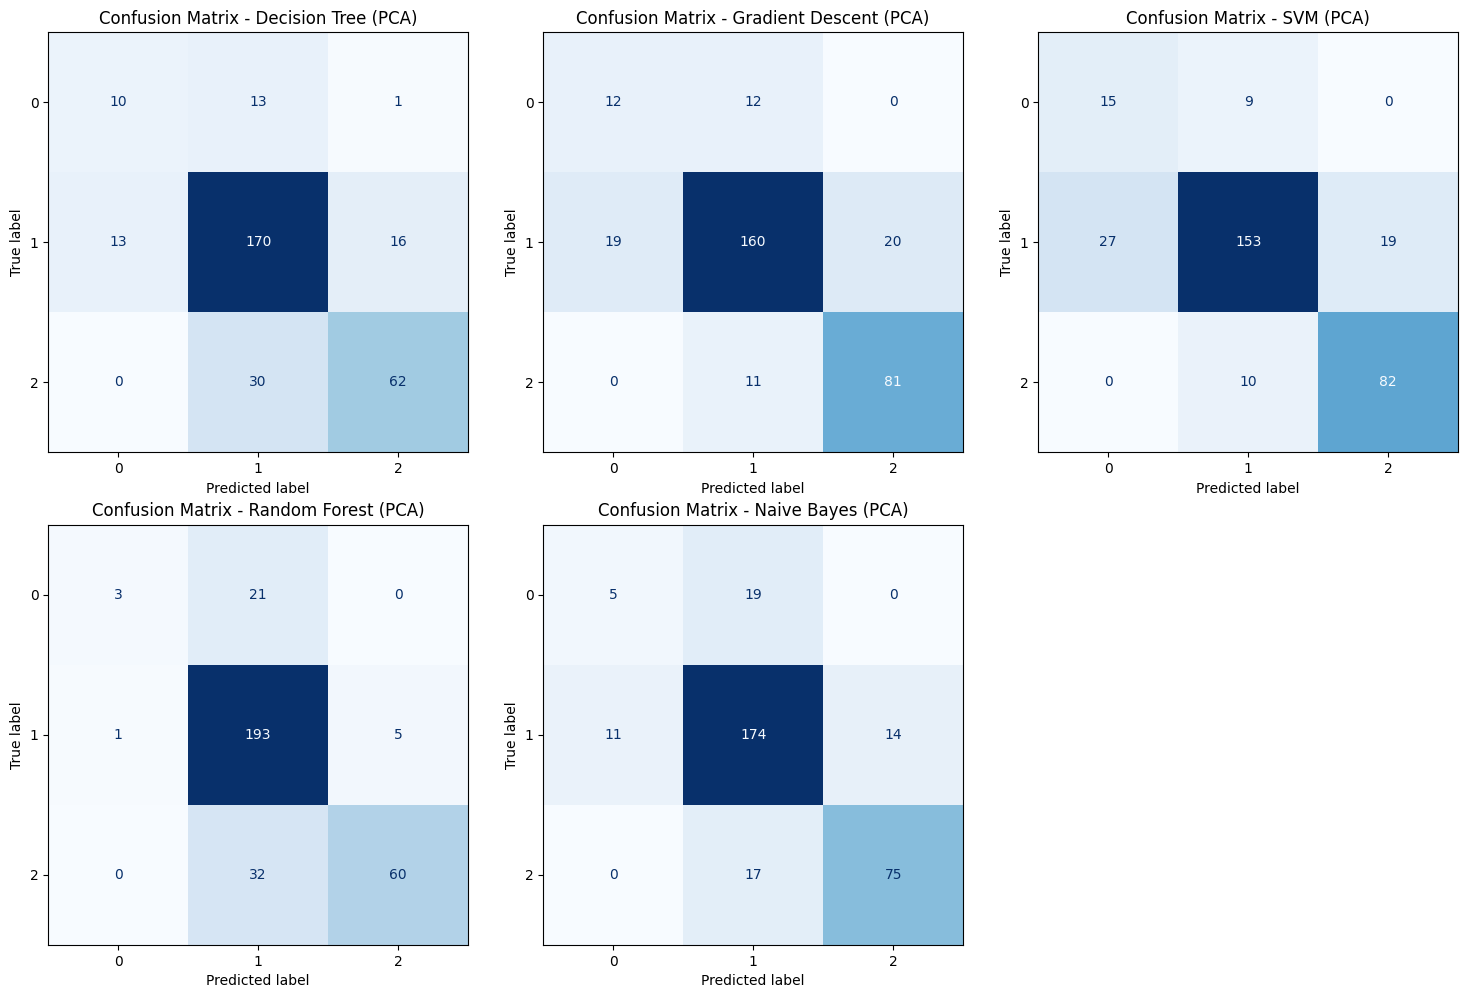

In [78]:
# Confusion Matrices for models with PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models_pca = {
    'Decision Tree': y_pred_dt_pca,
    'Gradient Descent': y_pred_gd_pca,
    'SVM': y_pred_svm_pca,
    'Random Forest': y_pred_rf_pca,
    'Naive Bayes': y_pred_nb_pca
}
plt.figure(figsize=(15, 10))
for i, (model_name, y_pred) in enumerate(models_pca.items(), start=1):
    plt.subplot(2, 3, i)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
    disp.plot(cmap='Blues', ax=plt.gca(), colorbar=False)
    plt.title(f'Confusion Matrix - {model_name} (PCA)')
plt.tight_layout()
plt.show()

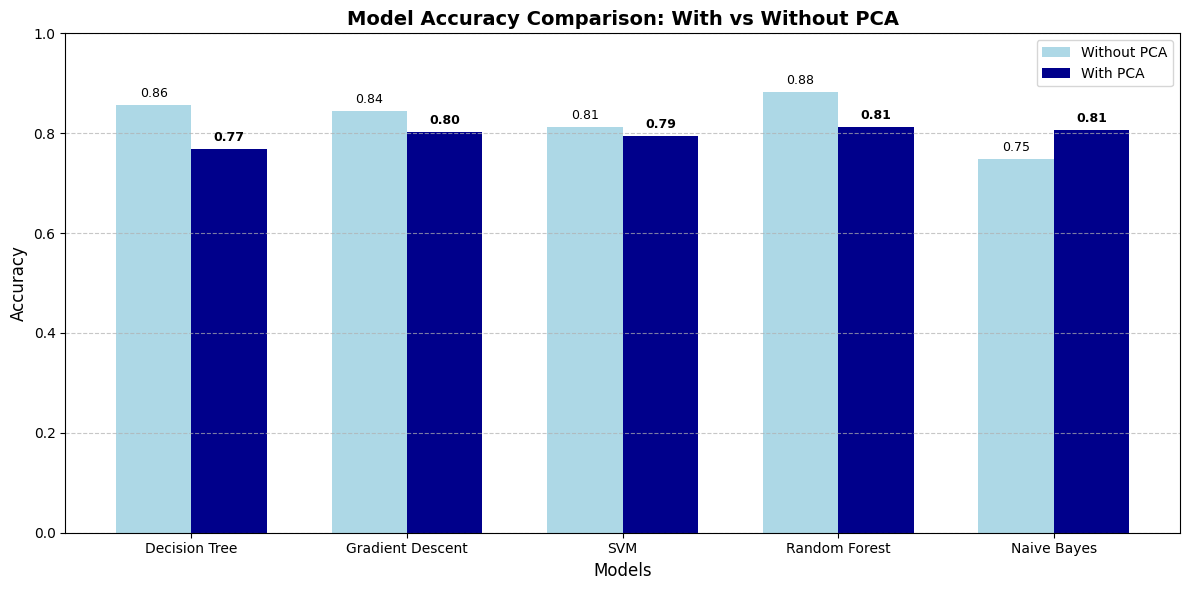

In [79]:
# Final Comparison: Accuracy with and without PCA
model_names = ['Decision Tree', 'Gradient Descent', 'SVM', 'Random Forest', 'Naive Bayes']
accuracies_no_pca = [accuracy_dt, accuracy_gd, accuracy_svm, accuracy_rf, accuracy_nb]
accuracies_pca = [accuracy_dt_pca, accuracy_gd_pca, accuracy_svm_pca, accuracy_rf_pca, accuracy_nb_pca]

x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width/2, accuracies_no_pca, width, label='Without PCA', color='lightblue')
bars2 = plt.bar(x + width/2, accuracies_pca, width, label='With PCA', color='darkblue')

for i in range(len(bars1)):
    plt.text(bars1[i].get_x() + bars1[i].get_width() / 2,
             bars1[i].get_height() + 0.01,
             f"{accuracies_no_pca[i]:.2f}", ha='center', va='bottom', fontsize=9, color='black')
    plt.text(bars2[i].get_x() + bars2[i].get_width() / 2,
             bars2[i].get_height() + 0.01,
             f"{accuracies_pca[i]:.2f}", ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')


plt.xticks(x, model_names)
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison: With vs Without PCA', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()